In [ ]:
#1. Initial Setup and Data Loading

# Import the necessary libraries and load the dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for plots for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Set default figure size

# Load the dataset
# Assuming 'salary.csv' is in the same directory as your Jupyter Notebook
try:
    df = pd.read_csv('salaries.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'salaries.csv' not found. Please ensure the file is in the correct directory.")
    # Exit or handle the error appropriately if the file is critical
    exit()

# Display the first few rows to get an initial look
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Get a concise summary of the DataFrame, including data types and non-null values
print("\nDataset Info:")
df.info()

# Display basic statistical summary for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

Dataset loaded successfully.

First 5 rows of the dataset:
   work_year experience_level employment_type             job_title  salary  \
0       2024               MI              FT        Data Scientist  120000   
1       2024               MI              FT        Data Scientist   70000   
2       2024               MI              CT        Data Scientist  130000   
3       2024               MI              CT        Data Scientist  110000   
4       2024               MI              FT  Data Science Manager  240000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         120000                 AU             0   
1             USD          70000                 AU             0   
2             USD         130000                 US             0   
3             USD         110000                 US             0   
4             USD         240000                 US             0   

  company_location company_size  
0               A

In [4]:
# Check for missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Identify duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")
    print(f"New number of rows after removing duplicates: {len(df)}")

# Standardize column names (optional but good practice)
df.columns = df.columns.str.lower().str.replace(' ', '_')
print("\nStandardized column names:")
print(df.columns)

# Ensure salary_in_usd is numerical
if not pd.api.types.is_numeric_dtype(df['salary_in_usd']):
    df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
    print("Converted 'salary_in_usd' to numeric.")

# Drop rows where 'salary_in_usd' might have become NaN due to conversion errors
df.dropna(subset=['salary_in_usd'], inplace=True)
print(f"Remaining rows after handling non-numeric salaries: {len(df)}")


Missing values before cleaning:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Number of duplicate rows: 6401
Duplicate rows removed.
New number of rows after removing duplicates: 10093

Standardized column names:
Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')
Remaining rows after handling non-numeric salaries: 10093


In [ ]:
#3.A In-depth Exploratory Data Analysis (EDA) for Career Insights

# Now that our data is loaded and initially cleaned, we'll dive into understanding the distributions of salaries and how various features influence them. This phase is crucial for extracting the insights that will help users make informed career decisions.
# A. Overall Salary Distribution and Outlier Identification
# Before analyzing specific features, it's essential to understand the general landscape of salaries in our dataset. This step will help us:
# Visualize the overall spread and frequency of different salary ranges.
# Identify if the salary distribution is skewed (which is common for financial data, usually indicating a long tail of higher earners).
# Detect potential outliers (unusually high or low salaries) that might require special attention during model development, as they can significantly impact model training.

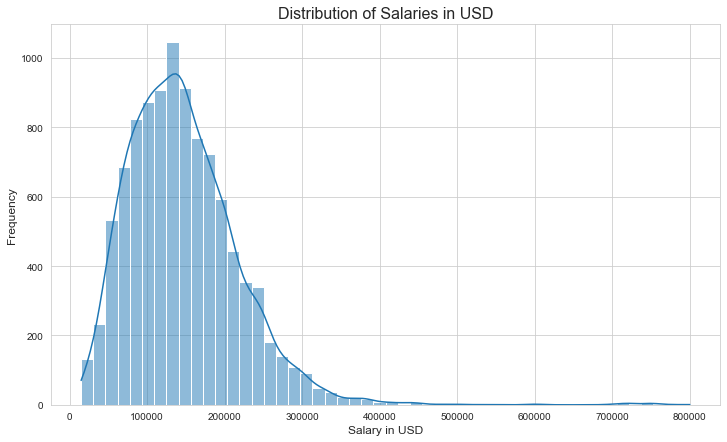

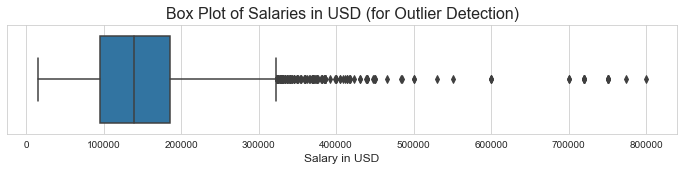


Skewness of Salary Distribution: 1.64
Kurtosis of Salary Distribution: 8.39

Number of outliers detected (IQR method): 173
Percentage of outliers: 1.71%
We need to consider our strategy for these outliers during the modeling phase (e.g., retain, transform, or remove) based on their impact on model performance and interpretability.


In [5]:
# Set a style for plots for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Set default figure size

# 1. Histogram to visualize salary distribution
plt.figure(figsize=(12, 7))
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title('Distribution of Salaries in USD', fontsize=16)
plt.xlabel('Salary in USD', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# 2. Box plot for clear outlier detection
plt.figure(figsize=(12, 2))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Box Plot of Salaries in USD (for Outlier Detection)', fontsize=16)
plt.xlabel('Salary in USD', fontsize=12)
plt.show()

# 3. Calculate skewness and kurtosis
print(f"\nSkewness of Salary Distribution: {df['salary_in_usd'].skew():.2f}")
print(f"Kurtosis of Salary Distribution: {df['salary_in_usd'].kurt():.2f}")

# 4. Quantile-based outlier detection (IQR method)
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]
print(f"\nNumber of outliers detected (IQR method): {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers) / len(df) * 100):.2f}%")
print("We need to consider our strategy for these outliers during the modeling phase (e.g., retain, transform, or remove) based on their impact on model performance and interpretability.")

In [ ]:
# Insight: The salary distribution is positively skewed, indicating that while many roles fall within a moderate salary range, there's a significant tail of higher-earning positions.

# Implication: A small percentage of outliers (extremely high or low salaries) exist, which will be handled strategically in the model building phase to ensure robust predictions.

In [ ]:
# 3.B. Impact of Experience Level on Salary

# Understanding how experience_level correlates with salary_in_usd is fundamental for anyone planning a career path in machine learning. This analysis will help us:
# Visualize salary ranges for different experience levels (e.g., Entry-level, Mid-level, Senior, Executive).
# Identify typical salary progression as one gains more experience in the field.
# Answer the key question: "What roles or experience levels yield the highest average salary?"

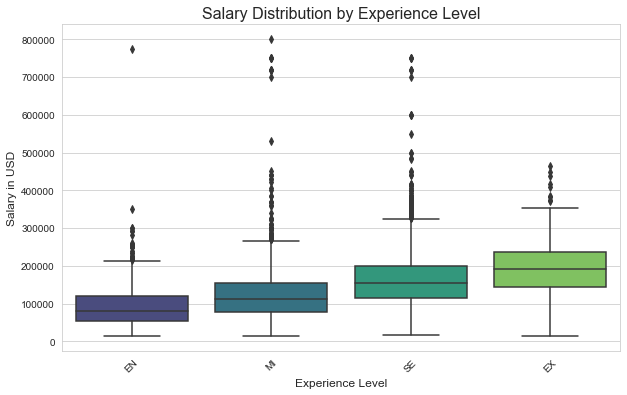


Average Salary by Experience Level:
experience_level
EX    195322.470437
SE    163360.962982
MI    123943.612423
EN     91377.920635
Name: salary_in_usd, dtype: float64


In [6]:
plt.figure(figsize=(10, 6))
# Sort the experience levels for better visualization order if they are not naturally ordered in the data
# Common ordering: EN (Entry-level), MI (Mid-level), SE (Senior-level), EX (Executive-level)
experience_order = ['EN', 'MI', 'SE', 'EX']
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=experience_order, palette='viridis')
plt.title('Salary Distribution by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Salary in USD', fontsize=12)
plt.xticks(rotation=45) # Rotate labels if they overlap
plt.show()

print("\nAverage Salary by Experience Level:")
# Calculate and print the average salary for each experience level, sorted for easy comparison
print(df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=False))

In [ ]:
# Insight: The salary distribution is positively skewed, indicating that while many roles fall within a moderate salary range, there's a significant tail of higher-earning positions.

# Implication: A small percentage of outliers (extremely high or low salaries) exist, which will be handled strategically in the model building phase to ensure robust predictions.

In [ ]:
# 3.C. Impact of Job Title on Salary

# The job_title feature is highly granular, with many unique roles. Analyzing this feature helps us:
# Identify the highest-paying machine learning-related roles.
# Understand the salary distribution and variability within common job titles.
# Answer the question: "How consistent are salaries across similar job titles?" for the top roles.
# Prepare our understanding for how these high-cardinality features will be handled by embedding layers in the Advanced Track model.
# Since there are many unique job titles, we will focus our visualization on the top N most frequent job titles to keep the plot readable and derive meaningful insights from the most common roles.

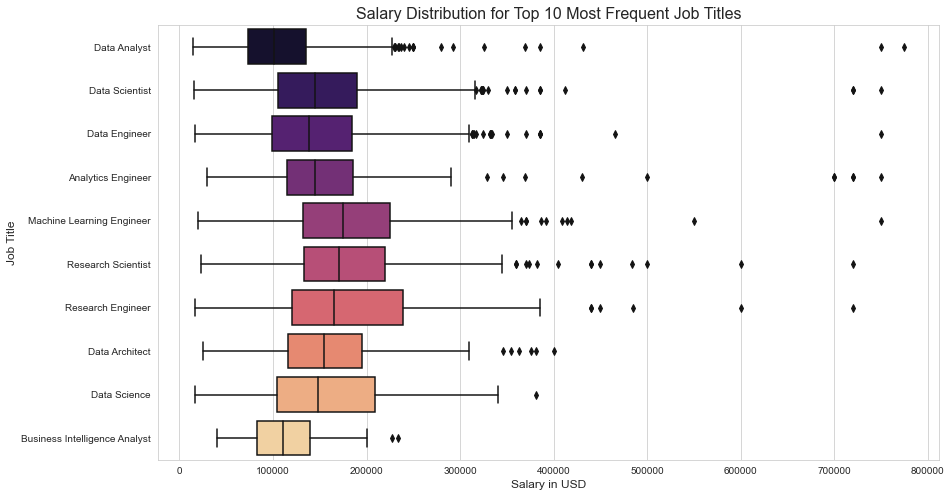


Average Salary for Top 10 Most Frequent Job Titles:
job_title
Research Scientist               187652.550314
Research Engineer                181941.697248
Machine Learning Engineer        181048.441270
Data Architect                   161908.224199
Analytics Engineer               160031.279661
Data Science                     158422.072816
Data Scientist                   150213.093239
Data Engineer                    145004.620446
Business Intelligence Analyst    114188.000000
Data Analyst                     107938.710355
Name: salary_in_usd, dtype: float64

Cardinality of 'job_title':
Total unique job titles: 155
This high cardinality confirms the need for embedding layers in our deep learning model.


In [7]:
# Get the top 10 most frequent job titles to focus our visualization
top_n_jobs = df['job_title'].value_counts().head(10).index
df_top_jobs = df[df['job_title'].isin(top_n_jobs)].copy() # Use .copy() to avoid SettingWithCopyWarning

plt.figure(figsize=(14, 8))
# Use boxplot to show distribution, sorted by median salary for better comparison
sns.boxplot(x='salary_in_usd', y='job_title', data=df_top_jobs.sort_values('salary_in_usd', ascending=False), palette='magma')
plt.title('Salary Distribution for Top 10 Most Frequent Job Titles', fontsize=16)
plt.xlabel('Salary in USD', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.show()

print("\nAverage Salary for Top 10 Most Frequent Job Titles:")
# Calculate and print the average salary for these top job titles
print(df_top_jobs.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False))

print("\nCardinality of 'job_title':")
print(f"Total unique job titles: {df['job_title'].nunique()}")
print("This high cardinality confirms the need for embedding layers in our deep learning model.")

In [ ]:
# Insight: Specific job titles like Research Scientist, Research Engineer, and Machine Learning Engineer consistently rank among the highest-paying roles on average.

# Implication: While some roles offer high averages, users should also consider the variability (spread) of salaries within specific job titles, as consistency can differ.

In [ ]:
# 3.D. Remote Work vs. Salary & Interaction with Experience/Job Title

# The shift towards remote work has significantly impacted the job market. This section will analyze how remote work status (remote_ratio) affects salaries and whether this effect varies based on experience_level or job_title. This directly addresses questions like:
# "Does remote work correlate with higher or lower salaries?"
# "Do certain job titles or experience levels benefit more from remote work?"
# Providing insights crucial for a user deciding if they want to be a "remote data engineer at a medium-size company or on-site at a huge company."

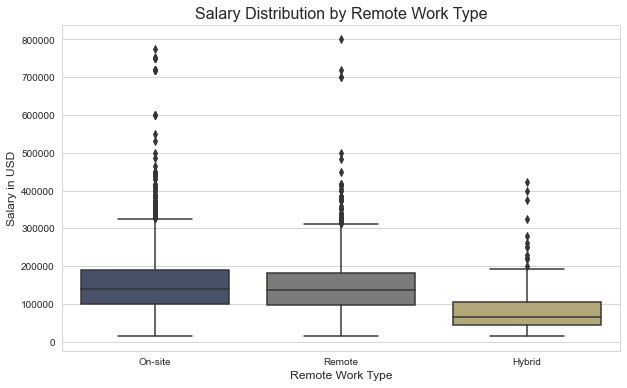


Average Salary by Remote Work Type:
remote_work_type
On-site    150967.867451
Remote     143249.150101
Hybrid      83086.631579
Name: salary_in_usd, dtype: float64


In [8]:
# 1. Map 'remote_ratio' to a more descriptive categorical label for better readability
# Assuming remote_ratio values are 0, 50, 100 as per common datasets
df['remote_work_type'] = df['remote_ratio'].map({0: 'On-site', 50: 'Hybrid', 100: 'Remote'})

plt.figure(figsize=(10, 6))
sns.boxplot(x='remote_work_type', y='salary_in_usd', data=df, palette='cividis')
plt.title('Salary Distribution by Remote Work Type', fontsize=16)
plt.xlabel('Remote Work Type', fontsize=12)
plt.ylabel('Salary in USD', fontsize=12)
plt.show()

print("\nAverage Salary by Remote Work Type:")
print(df.groupby('remote_work_type')['salary_in_usd'].mean().sort_values(ascending=False))

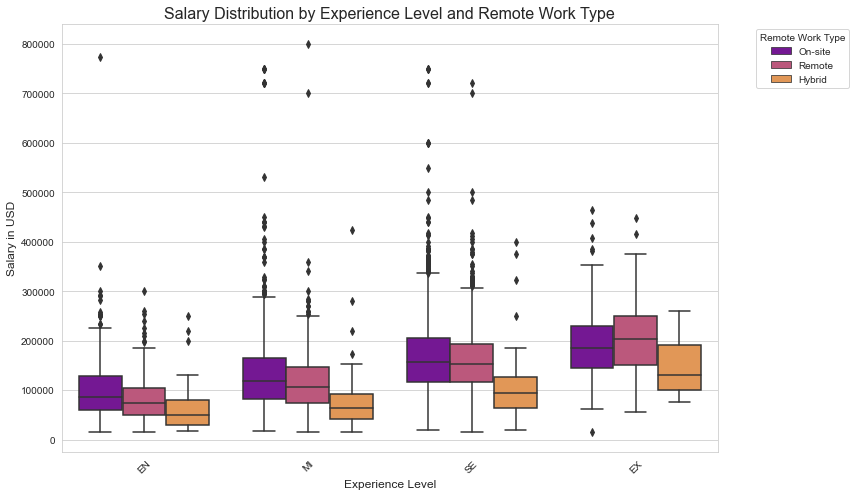

In [9]:
# 2. Interaction: Remote Work and Experience Level
# This plot will show if the impact of remote work varies across different experience levels
plt.figure(figsize=(12, 7))
# Ensure experience_level is ordered for consistent plotting
experience_order = ['EN', 'MI', 'SE', 'EX']
sns.boxplot(x='experience_level', y='salary_in_usd', hue='remote_work_type', data=df, order=experience_order, palette='plasma')
plt.title('Salary Distribution by Experience Level and Remote Work Type', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Salary in USD', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Remote Work Type', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside
plt.tight_layout() # Adjust layout to prevent legend overlap
plt.show()

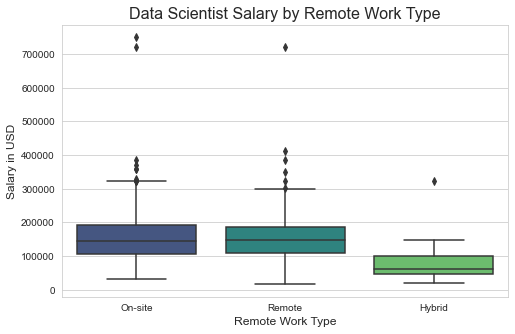


Average Data Scientist Salary by Remote Work Type:
remote_work_type
On-site    153646.094583
Remote     150066.455574
Hybrid      75178.250000
Name: salary_in_usd, dtype: float64


In [10]:
# 3. Optional: Interaction for a specific high-frequency Job Title (e.g., 'Data Scientist')
# This allows for a deeper dive into specific career paths.
# You can uncomment and modify this to explore other job titles.
if 'Data Scientist' in df['job_title'].unique():
     df_ds = df[df['job_title'] == 'Data Scientist'].copy()
     if not df_ds.empty:
         plt.figure(figsize=(8, 5))
         sns.boxplot(x='remote_work_type', y='salary_in_usd', data=df_ds, palette='viridis')
         plt.title('Data Scientist Salary by Remote Work Type', fontsize=16)
         plt.xlabel('Remote Work Type', fontsize=12)
         plt.ylabel('Salary in USD', fontsize=12)
         plt.show()
         print("\nAverage Data Scientist Salary by Remote Work Type:")
         print(df_ds.groupby('remote_work_type')['salary_in_usd'].mean().sort_values(ascending=False))

In [ ]:
# Insight: Interestingly, On-site and Remote roles show comparable average salaries, while Hybrid roles tend to have a noticeably lower average.

# Implication: The impact of remote work on salary can vary significantly with experience level. This suggests that the desirability or financial benefit of remote work might differ at various stages of one's career.

In [ ]:
# E. Company Size and Location Influence

# The size and geographical location of a company can play a significant role in compensation packages. This analysis aims to:
# Determine if company size (Small, Medium, Large) correlates with different salary ranges.
# Identify potential salary disparities based on the company's geographical location.
# Address the question: "Are there differences in salary based on company size or location?"
# Further inform a user's decision between, for example, "a remote data engineer at a medium size company or on-site at a huge or large size company."

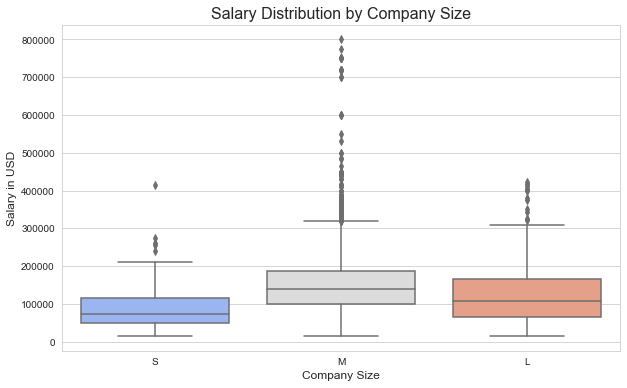


Average Salary by Company Size:
company_size
M    149588.921749
L    121670.976599
S     86780.197861
Name: salary_in_usd, dtype: float64


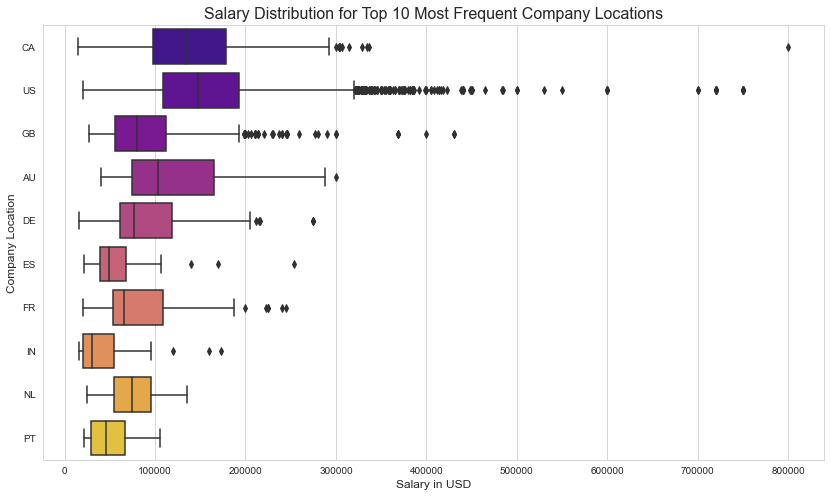


Average Salary for Top 10 Most Frequent Company Locations:
company_location
US    156641.012324
CA    143410.678218
AU    124672.452830
GB     96289.044362
DE     94130.865385
FR     88523.718750
NL     75759.937500
ES     58775.189189
PT     50253.892857
IN     42726.396825
Name: salary_in_usd, dtype: float64

Cardinality of 'company_location':
Total unique company locations: 77
High cardinality for company location also suggests the utility of embedding layers in our deep learning model.


In [11]:
# 1. Salary Distribution by Company Size
plt.figure(figsize=(10, 6))
# Ensure company_size is ordered for consistent plotting
company_size_order = ['S', 'M', 'L'] # Small, Medium, Large
sns.boxplot(x='company_size', y='salary_in_usd', data=df, order=company_size_order, palette='coolwarm')
plt.title('Salary Distribution by Company Size', fontsize=16)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Salary in USD', fontsize=12)
plt.show()

print("\nAverage Salary by Company Size:")
print(df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False))

# 2. Salary Distribution by Company Location
# 'company_location' can have many unique values, similar to 'job_title'.
# We'll visualize the top N most frequent locations for clarity.
top_n_locations = df['company_location'].value_counts().head(10).index
df_top_locations = df[df['company_location'].isin(top_n_locations)].copy() # Use .copy() to avoid SettingWithCopyWarning

plt.figure(figsize=(14, 8))
sns.boxplot(x='salary_in_usd', y='company_location', data=df_top_locations.sort_values('salary_in_usd', ascending=False), palette='plasma')
plt.title('Salary Distribution for Top 10 Most Frequent Company Locations', fontsize=16)
plt.xlabel('Salary in USD', fontsize=12)
plt.ylabel('Company Location', fontsize=12)
plt.show()

print("\nAverage Salary for Top 10 Most Frequent Company Locations:")
print(df_top_locations.groupby('company_location')['salary_in_usd'].mean().nlargest(10))

print("\nCardinality of 'company_location':")
print(f"Total unique company locations: {df['company_location'].nunique()}")
print("High cardinality for company location also suggests the utility of embedding layers in our deep learning model.")

In [ ]:
# Insight: Medium-sized companies (M) generally offer the highest average salaries, followed by Large (L), and then Small (S) companies.

# Implication: Salary expectations can also vary considerably based on geographical location, with certain regions typically offering higher compensation for similar roles.

In [ ]:
# F. Variance in Salaries within Employment Type and Company Size

# While averages are useful, understanding the variance or spread of salaries within specific groups provides a more complete picture. This section aims to:
# Assess the consistency of salaries for different employment_type categories (e.g., Full-time, Contract).
# Investigate how company_size interacts with employment_type to influence salary distributions.
# Directly answer: "What is the variance in salaries within the same employment type and company size?"
# Provide a nuanced view that helps users understand the potential range of earnings for specific work arrangements and company environments.

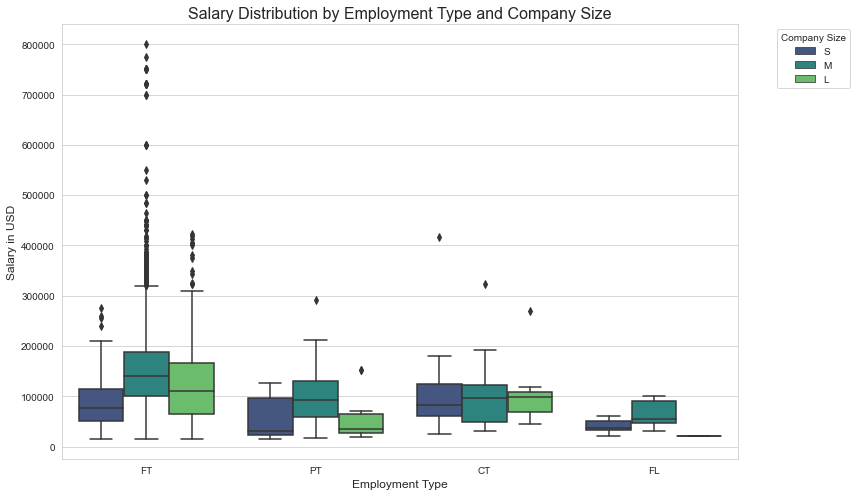


Numerical Summary of Salary by Employment Type and Company Size:
                          mean                                  median  \
company_size                 L              M              S         L   
employment_type                                                          
CT               109984.571429  107855.833333  120892.555556   97712.0   
FL                20000.000000   64259.166667   40505.285714   20000.0   
FT               122975.860353  149811.369864   87955.830303  110000.0   
PT                58724.300000  102347.636364   57269.166667   35000.0   

                                             std                               \
company_size            M        S             L             M              S   
employment_type                                                                 
CT                97500.0  83200.0  75527.914654  82628.890758  120755.159823   
FL                55000.0  36014.0           NaN  29325.125817   13422.087080   
FT        

In [13]:
plt.figure(figsize=(12, 7))
# Create a box plot showing salary distribution for each employment type, segmented by company size
# This helps us see the interaction between these two features.
sns.boxplot(x='employment_type', y='salary_in_usd', hue='company_size', data=df, palette='viridis',
            order=df['employment_type'].value_counts().index, # Order by frequency if desired
            hue_order=['S', 'M', 'L']) # Ensure consistent order for company size
plt.title('Salary Distribution by Employment Type and Company Size', fontsize=16)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Salary in USD', fontsize=12)
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside
plt.tight_layout() # Adjust layout to prevent legend overlap
plt.show()

# Provide a numerical summary (mean, median, standard deviation, count) for deeper analysis of variance
print("\nNumerical Summary of Salary by Employment Type and Company Size:")
print(df.groupby(['employment_type', 'company_size'])['salary_in_usd'].agg(
    ['mean', 'median', 'std', 'count']
).unstack())

# Optional: You can also look at specific slices if desired, e.g., only for 'FT' employment type
print("\nFull-time (FT) Salary Statistics by Company Size:")
print(df[df['employment_type'] == 'FT'].groupby('company_size')['salary_in_usd'].agg(['mean', 'median', 'std', 'count']))

In [ ]:
# Insight: Analyzing the standard deviation (STD) of salaries reveals that consistency in pay can vary greatly depending on the combination of employment_type and company_size. For instance, Full-time (FT) roles in medium-sized companies might show a different salary spread than those in large or small companies.

# Implication: This detailed view of variance helps users understand the potential range of earnings and financial stability associated with specific work arrangements and company contexts.